**Importing libraries and dataset**









In [7]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 K

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# import gradio as gr
import pickle

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
df = pd.read_excel("/content/gdrive/MyDrive/PROJECTS/ML PROJECT(2-2)/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Studying dataset**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [13]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [15]:
df.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [16]:
df.isnull().sum().sum()

223863

In [17]:
df.shape

(1925, 231)

**Data preprocessing and visualization**

In [18]:
df.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

Outside the ICU:  1410
Inside the ICU:  515


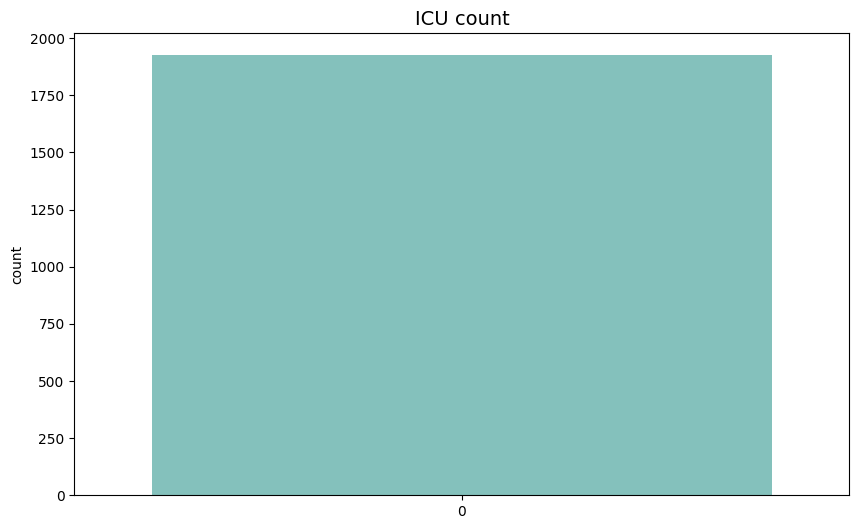

In [19]:
#Number of people in icu
plt.figure(figsize=(10,6))
plt.title('ICU count', fontsize=14)
sns.countplot(df['ICU'], palette='GnBu')

print('Outside the ICU: ',len(df[df['ICU']==0]))
print('Inside the ICU: ',len(df[df['ICU']==1]))
plt.show()

In [ ]:
#finding relation between age and admitting to icu
plt.figure(figsize=(12,10))

plt.title('Relation between age and being admitted ', fontsize=14)
sns.countplot(df['AGE_PERCENTIL'], hue='ICU', data=df, palette='GnBu')

Finding the categorical columns

In [21]:
cat = df.select_dtypes(include=['object']).copy()

In [22]:
cat.columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [23]:
cat['AGE_PERCENTIL'].value_counts()

20th          215
10th          205
30th          205
40th          200
70th          195
50th          190
80th          190
60th          185
Above 90th    185
90th          155
Name: AGE_PERCENTIL, dtype: int64

In [24]:
cat['WINDOW'].value_counts()

0-2         385
2-4         385
4-6         385
6-12        385
ABOVE_12    385
Name: WINDOW, dtype: int64

**Encoding categorical data**

In [25]:
def cat_window(window):
    if window == "ABOVE_12":
        return(13)
    else:
        return(int((window.split("-")[1])))


df['WINDOW'] = df['WINDOW'].apply(lambda x: cat_window(x))

In [26]:
df['WINDOW']

0        2
1        4
2        6
3       12
4       13
        ..
1920     2
1921     4
1922     6
1923    12
1924    13
Name: WINDOW, Length: 1925, dtype: int64

In [27]:
def cat_percentil(percentil):
    if percentil == "Above 90th":
        return(100)
    else:
        return(int("".join(c for c in str(percentil) if c.isdigit())))

        


# checking AGE_PERCENTIL 
df['AGE_PERCENTIL'] = df['AGE_PERCENTIL'].apply(lambda x: cat_percentil(x))

In [28]:
df['AGE_PERCENTIL']

0       60
1       60
2       60
3       60
4       60
        ..
1920    50
1921    50
1922    50
1923    50
1924    50
Name: AGE_PERCENTIL, Length: 1925, dtype: int64

**Handling nulls**

In [29]:
print("Nulls:",df.isnull().sum().sum())

Nulls: 223863


In [30]:
#using interpolate to remove nulls
df.interpolate(inplace = True)

In [31]:
df.dropna(inplace = True)

In [32]:
df.isnull().sum().sum()

0

In [33]:
#final shape of dataset
print("Shape:",df.shape)

Shape: (1923, 231)


**Feature Selection**

*Dropping columns using correlation*

<Axes: >

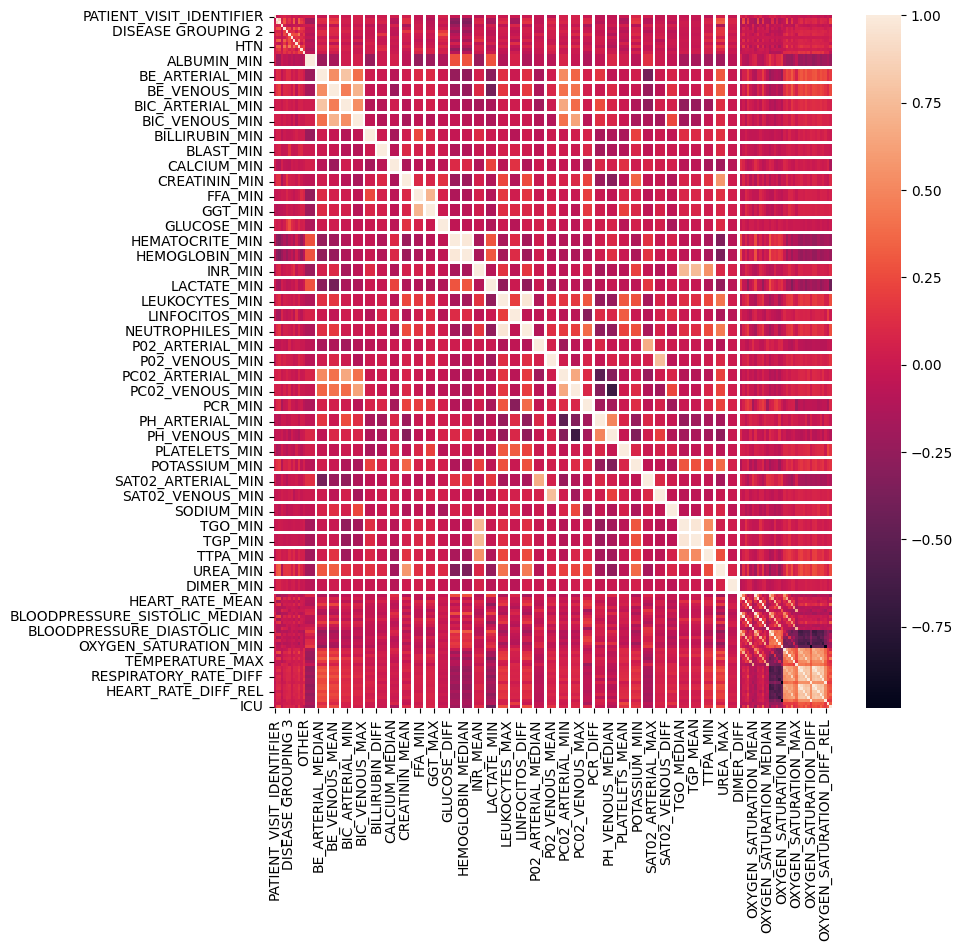

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr())

In [35]:
df.corr()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,1.000000,-0.028872,0.021119,0.058507,0.075817,0.044603,0.040428,-0.017318,0.013963,0.022760,...,-0.012243,-0.055174,-0.017114,-0.029878,-0.055699,-0.027428,-0.011715,-0.055232,-0.001816,-0.048717
AGE_ABOVE65,-0.028872,1.000000,0.869228,0.050638,0.268034,0.068034,0.158659,0.016887,0.303939,-0.020421,...,0.072866,0.070677,0.089112,0.101394,0.036752,0.095535,0.074056,0.071970,0.001120,0.213035
AGE_PERCENTIL,0.021119,0.869228,1.000000,0.074644,0.297554,0.076593,0.132523,0.003761,0.334598,-0.055577,...,0.080719,0.050838,0.100409,0.115340,0.031007,0.106423,0.082059,0.051973,0.000249,0.238239
GENDER,0.058507,0.050638,0.074644,1.000000,0.038869,-0.032206,-0.074060,-0.054430,-0.019711,-0.012844,...,-0.049697,-0.016291,0.005639,0.000003,-0.042720,-0.023034,-0.048970,-0.016771,-0.000802,-0.066056
DISEASE GROUPING 1,0.075817,0.268034,0.297554,0.038869,1.000000,0.194173,0.240525,0.010704,0.335059,0.172116,...,0.045871,0.003059,0.055689,0.062434,0.052607,0.055925,0.047087,0.003226,0.034093,0.061613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RESPIRATORY_RATE_DIFF_REL,-0.027428,0.095535,0.106423,-0.023034,0.055925,0.084179,0.089687,0.022102,0.079837,0.055683,...,0.772791,0.535952,0.776503,0.805231,0.759707,1.000000,0.773362,0.535973,0.280020,0.360440
TEMPERATURE_DIFF_REL,-0.011715,0.074056,0.082059,-0.048970,0.047087,0.094731,0.086383,0.014444,0.053211,0.069103,...,0.999888,0.519855,0.790734,0.830297,0.809250,0.773362,1.000000,0.520109,0.316675,0.233420
OXYGEN_SATURATION_DIFF_REL,-0.055232,0.071970,0.051973,-0.016771,0.003226,0.074079,0.053021,0.011559,0.019419,0.053907,...,0.520216,0.999842,0.538049,0.556606,0.530451,0.535973,0.520109,1.000000,0.169303,0.183340
WINDOW,-0.001816,0.001120,0.000249,-0.000802,0.034093,0.036181,0.046926,0.008243,0.028031,0.052697,...,0.316734,0.169222,0.303148,0.324350,0.309540,0.280020,0.316675,0.169303,1.000000,0.316412


In [36]:

def correlate(ds,threshold):
  col_corr = set()
  cor_matrix = ds.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_corr.add(cor_matrix.columns[i])
  return col_corr

In [37]:
cor_features = correlate(df,0.9)
print(cor_features)
print(len(cor_features))

{'HEMATOCRITE_MIN', 'PC02_VENOUS_MAX', 'SODIUM_MAX', 'PLATELETS_MEAN', 'TGO_MAX', 'SAT02_VENOUS_MAX', 'PH_ARTERIAL_MAX', 'GLUCOSE_MAX', 'BILLIRUBIN_MEAN', 'RESPIRATORY_RATE_MEDIAN', 'P02_VENOUS_MEAN', 'BLOODPRESSURE_SISTOLIC_DIFF', 'HEMOGLOBIN_MAX', 'PH_ARTERIAL_MEAN', 'TTPA_MIN', 'CREATININ_MAX', 'HEART_RATE_MEDIAN', 'UREA_MEAN', 'CREATININ_MEAN', 'INR_MIN', 'PC02_VENOUS_MEAN', 'SAT02_VENOUS_MIN', 'BILLIRUBIN_MIN', 'BIC_ARTERIAL_MAX', 'BLAST_MIN', 'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'BE_ARTERIAL_MAX', 'PLATELETS_MAX', 'LINFOCITOS_MIN', 'LEUKOCYTES_MEAN', 'CREATININ_MIN', 'OXYGEN_SATURATION_DIFF', 'INR_MEAN', 'TGP_MEDIAN', 'PCR_MEAN', 'DIMER_MAX', 'PC02_ARTERIAL_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'TTPA_MEAN', 'HEMOGLOBIN_MIN', 'HEMOGLOBIN_MEAN', 'ALBUMIN_MEAN', 'FFA_MEAN', 'TGP_MAX', 'GGT_MEAN', 'GLUCOSE_MIN', 'TGO_MEAN', 'HEART_RATE_DIFF_REL', 'BILLIRUBIN_MAX', 'CALCIUM_MAX', 'LACTATE_MEAN', 'LINFOCITOS_MEAN', 'CALCIUM_MEAN', 'SODIUM_MEAN', 'NEUTROPHILES_MEDIAN', 'BIC_VENOUS_MAX'

In [38]:
df.drop(cor_features,axis =1,inplace = True)

dropping constant and quasi constant columns

In [39]:
var = VarianceThreshold(threshold = 0.01)
var.fit(df)
concol1 = [column for column in df.columns 
          if column not in df.columns[var.get_support()]]
df.drop(concol1,axis=1,inplace = True)


In [40]:
print(concol1)

['ALBUMIN_DIFF', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_MEDIAN', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_MEDIAN', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_MEDIAN', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF', 'POTASSIUM_DIFF', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF', 'SODIUM_DIFF', 'TGO_MEDIAN', 'TGO_DIFF', 'TGP_DIFF', 'TTPA_MEDIAN', 'TTPA_DIFF', 'UREA_DIFF', 'DIMER_DIFF']


In [41]:


var = VarianceThreshold(threshold=0)
var.fit(df)
concol = [column for column in df.columns 
          if column not in df.columns[var.get_support()]]
df.drop(concol,axis=1,inplace = True)


In [42]:
print(df.shape)

(1923, 62)


**Splitting dataset**

In [43]:
y = df.ICU

In [44]:
y

2       0
3       0
4       1
5       1
6       1
       ..
1920    0
1921    0
1922    0
1923    0
1924    0
Name: ICU, Length: 1923, dtype: int64

In [45]:
X = df.drop('ICU',axis = 1)

In [46]:
X

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,WINDOW
2,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.210811,-0.109453,-0.333333,-0.014493,0.657895,-0.779710,-0.628499,-0.607843,-1.000000,6
3,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.037838,0.094527,-0.030303,-0.275362,0.736842,-0.559420,-0.256997,-0.215686,-1.000000,12
4,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.114504,0.176471,-0.238095,13
5,1,1,90,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.329730,-0.059701,0.636364,-0.275362,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2
6,1,1,90,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.329730,-0.388060,-0.454545,-0.275362,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.502703,-0.164179,-0.575758,0.246377,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,2
1921,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.567568,-0.298507,-0.636364,-0.072464,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,4
1922,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.459459,-0.343284,-0.636364,-0.072464,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,6
1923,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.567568,-0.358209,-0.696970,0.043478,0.473684,-1.000000,-1.000000,-1.000000,-1.000000,12


Train test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [48]:
X_train.shape

(1538, 61)

In [49]:

X_test.shape

(385, 61)

In [50]:



X_train

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,WINDOW
801,160,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.275676,-0.149254,-0.515152,-0.101449,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,4
1028,205,1,60,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.459459,-0.507463,-0.575758,-0.507246,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,12
1889,377,0,20,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.178378,-0.388060,-0.454545,0.391304,0.947368,-0.443478,-0.557252,-0.764706,-0.357143,13
825,165,0,30,0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.421622,0.029851,-0.242424,0.159420,0.710526,-0.686957,-0.526718,-0.588235,-0.619048,2
567,113,1,100,0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.056757,-0.388060,-0.469697,0.224638,0.907895,-0.908696,-0.858779,-0.926471,-0.833333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,167,0,20,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.581081,-0.417910,-0.166667,0.057971,0.921053,-0.604348,-0.740458,-0.367647,-0.726190,6
1218,243,1,100,0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.610811,-0.328358,0.454545,-0.246377,0.842105,-0.947826,-0.893130,-0.470588,-0.738095,12
1655,331,1,70,0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.062162,-0.227612,-0.469697,0.036232,0.802632,-0.426087,-0.404580,-0.750000,-0.553571,2
561,112,0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.091892,0.022388,0.484848,0.463768,0.894737,-0.434783,-0.404580,0.058824,-0.488095,4


In [51]:
X_test

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,WINDOW
622,124,0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.567568,-0.328358,-0.439394,-0.007246,0.750000,-0.956522,-0.935115,-0.897059,-0.958333,6
822,164,1,70,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.562162,-0.470149,-0.636364,-0.333333,0.763158,-0.965217,-0.862595,-1.000000,-1.000000,6
669,133,0,50,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.264865,-0.343284,-0.454545,-0.043478,0.947368,-0.426087,-0.541985,-0.705882,-0.738095,13
746,149,1,100,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.064865,-0.231343,0.030303,-0.043478,0.921053,-0.530435,-0.587786,-0.382353,-0.607143,4
1281,256,0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.275676,-0.432836,-0.515152,-0.101449,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,41,1,70,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.048649,-0.791045,-0.212121,-0.304348,1.000000,-0.617391,-0.908397,-1.000000,-0.666667,4
1303,260,0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.308108,-0.194030,-0.272727,-0.333333,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,12
221,44,0,40,0,0.0,0.0,1.0,1.0,0.0,0.0,...,-0.445045,0.019900,-0.474747,0.275362,0.807018,-0.756522,-0.730280,-0.882353,-0.730159,4
993,198,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.448649,-0.283582,-0.515152,0.304348,0.684211,-0.843478,-0.832061,-1.000000,-0.833333,12


In [52]:
y_train

801     0
1028    0
1889    0
825     0
567     0
       ..
837     0
1218    1
1655    0
561     0
686     0
Name: ICU, Length: 1538, dtype: int64

**Feature Scaling**

In [53]:
Standardisation = preprocessing.StandardScaler()
xtrain = Standardisation.fit_transform(X_train)
xtest = Standardisation.fit_transform(X_test)

In [54]:
xtrain

array([[-0.30044362, -0.93941308, -0.11346623, ..., -0.72974486,
        -0.86159472, -0.7837439 ],
       [ 0.10806904,  1.06449444,  0.23625534, ..., -0.72974486,
        -0.86159472,  1.05165483],
       [ 1.66949524, -0.93941308, -1.16263097, ..., -0.17975196,
         1.37318624,  1.28107967],
       ...,
       [ 1.25190451,  1.06449444,  0.58597692, ..., -0.1453774 ,
         0.6903365 , -1.24259358],
       [-0.73619047, -0.93941308, -0.46318781, ...,  1.74522319,
         0.91795308, -0.7837439 ],
       [-0.50923899,  1.06449444,  0.9356985 , ...,  0.64523739,
        -0.11666774, -0.7837439 ]])

In [55]:
xtest

array([[-0.56506464, -0.92247577, -0.79122325, ..., -0.48640108,
        -0.70521719, -0.31005118],
       [-0.21529192,  1.08403932,  0.5871521 , ..., -0.73039532,
        -0.85230268, -0.31005118],
       [-0.48636578, -0.92247577, -0.10203558, ..., -0.03326892,
         0.07223471,  1.28763127],
       ...,
       [-1.26461008, -0.92247577, -0.44662942, ..., -0.45154476,
         0.100251  , -0.76653188],
       [ 0.08201489, -0.92247577, -1.48041093, ..., -0.73039532,
        -0.2639607 ,  1.05939092],
       [ 1.00016828, -0.92247577, -0.44662942, ..., -0.5212574 ,
         0.32438128, -0.76653188]])

**models**



*Using svc*

In [56]:
from sklearn import metrics
# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(xtrain, y_train)
  
prediction = svc_model .predict(xtest)
print(metrics.accuracy_score(y_test,prediction)*100)

91.42857142857143


trying to improve accuracy using gridsearch

In [57]:
'''
# defining parameter range
param_grid = {'C': [0.1, 1,5, 10,50, 100,500, 1000],
              'gamma': [1, 0.1,0.5, 0.01,0.05, 0.001,0.005, 0.0001],
              'kernel' : ['rbf','poly','sigmoid']
}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(xtrain, y_train)'''

"\n# defining parameter range\nparam_grid = {'C': [0.1, 1,5, 10,50, 100,500, 1000],\n              'gamma': [1, 0.1,0.5, 0.01,0.05, 0.001,0.005, 0.0001],\n              'kernel' : ['rbf','poly','sigmoid']\n}\n \ngrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)\n# fitting the model for grid search\ngrid.fit(xtrain, y_train)"

In [58]:
'''# best parameter after tuning
print(grid.best_params_)
 
# model after hyper-parameter tuning
print(grid.best_estimator_)'''

'# best parameter after tuning\nprint(grid.best_params_)\n \n# model after hyper-parameter tuning\nprint(grid.best_estimator_)'

using the best parameters from the above gridsearch result

In [59]:
svc_model = SVC(C = 10,kernel = 'rbf',gamma = 0.01)
svc_model.fit(xtrain, y_train)
  
prediction = svc_model.predict(xtest)
print("Improved Accuracy is",svc_model.score(xtest, y_test)*100)

Improved Accuracy is 92.98701298701299


Decision Tree

In [60]:
model = tree.DecisionTreeClassifier()
model = model.fit(xtrain, y_train)

In [61]:
predicted_value = model.predict(xtest)

In [62]:
print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, predicted_value)*100)

ACCURACY OF THE MODEL:  80.0


In [63]:
predicted_value = model.predict(xtrain)

In [64]:
print("ACCURACY OF THE MODEL: ",accuracy_score(y_train, predicted_value)*100)

ACCURACY OF THE MODEL:  100.0


*Random forest*

In [65]:
# creating a RF classifier
clf = RandomForestClassifier()
clf.fit(xtrain, y_train)
y_pred = clf.predict(xtest)
print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  89.0909090909091


In [66]:
'''
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)'''

"\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\nmax_features = ['auto', 'sqrt']\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\nmin_samples_split = [2, 5, 10]\nmin_samples_leaf = [1, 2, 4]\nbootstrap = [True, False]\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)"

In [67]:
'''rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(xtrain, y_train)'''

'rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\nrf_random.fit(xtrain, y_train)'

In [68]:
'''print(rf_random.best_estimator_)'''

'print(rf_random.best_estimator_)'

In [69]:

clf = RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)
clf.fit(xtrain, y_train)
y_pred = clf.predict(xtest)
print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  90.64935064935065


In [70]:
y_pred = clf.predict(xtrain)
print("ACCURACY OF THE MODEL: ",accuracy_score(y_train, y_pred)*100)

ACCURACY OF THE MODEL:  100.0


KNN

In [71]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xtrain,y_train)
predictedlabels = neigh.predict(xtest)
accuracy_score(y_test, predictedlabels)

0.8597402597402597

In [72]:

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
clf = GridSearchCV(neigh, hyperparameters, cv=10)
best_model = clf.fit(xtrain,y_train)

In [ ]:
y_pred = best_model.predict(xtest)

In [ ]:
y_pred = best_model.predict(xtrain)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print(accuracy_score(y_train, y_pred))

**Deployment**

In [ ]:
df.drop("ICU",axis = 1,inplace = True)

In [ ]:
df.index.name = "index"

In [ ]:
index = [x for x in range(1,1924)]

In [ ]:
df.index = index

In [ ]:
df

pickling the model

In [ ]:
pickle.dump(svc_model,open('csv.sav','wb'))

In [ ]:
model = pickle.load(open('csv.sav','rb'))

Deployement using gradio

In [ ]:
def predict_res(id):
  x = df.loc[id].to_numpy()
  a_stand = (x - X_train.mean())/(X_train.std())
  if model.predict([a_stand]) == 0:
    return "No bed required"
  elif model.predict([a_stand]) == 1:
    return "Bed required"

In [ ]:
title = "<u>Prediction of ICU requirement</u>"
description = """
<center>
The bot was trained to predict the requirement of ICU bed for a patient. Give the ID of the patient
<img src="https://cdn.cnn.com/cnnnext/dam/assets/200513170740-coronavirus-questions-answered-illustration-super-169.jpg" width="600" height="600">
</center>
"""

In [ ]:
outputs = gr.outputs.Textbox()

In [ ]:
css_code='body{background-image:url("https://preview.pixlr.com/images/800wm/1143/1/1143151214.jpg");}'

In [ ]:
gr.Interface(predict_res, inputs="number", outputs=outputs,title = title,description = description,css = css_code).launch(share = True)